In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
# data from https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv

In [2]:
train_df=pd.read_csv('./data/train.csv',low_memory=False)
# train column
# ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
#        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
#        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
#        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
#        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
#        'Credit_Utilization_Ratio', 'Credit_History_Age',
#        'Payment_of_Min_Amount', 'Total_EMI_per_month',
#        'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
#        'Credit_Score']
# 'Credit_Score' in 3 class: Good, Standard, Poor.
test_df=pd.read_csv('./data/test.csv',low_memory=False)
# test column
# ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
#        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
#        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
#        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
#        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
#        'Credit_Utilization_Ratio', 'Credit_History_Age',
#        'Payment_of_Min_Amount', 'Total_EMI_per_month',
#        'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

# data we need to use
# feature_list=['Occupation','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
#               'Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Num_Credit_Inquiries','Outstanding_Debt',
#               'Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
#backup data
train_df_back=train_df.copy()
test_df_back=test_df.copy()

# Data Description

In [3]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [4]:
train_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [5]:
# drop datapoint containing any nan and split the data according to credit score.
train_df=train_df.dropna(how='any')
good_df=train_df[train_df['Credit_Score']=='Good']
standard_df=train_df[train_df['Credit_Score']=='Standard']
poor_df=train_df[train_df['Credit_Score']=='Poor']

In [6]:
# distribution of annual income in different credit score
annual_income=train_df[~train_df['Annual_Income'].str.contains('_')]
annual_income['Annual_Income']=pd.to_numeric(annual_income['Annual_Income'])


C:\Users\cheng\AppData\Local\Temp\ipykernel_23084\3144479238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_income['Annual_Income']=pd.to_numeric(annual_income['Annual_Income'])


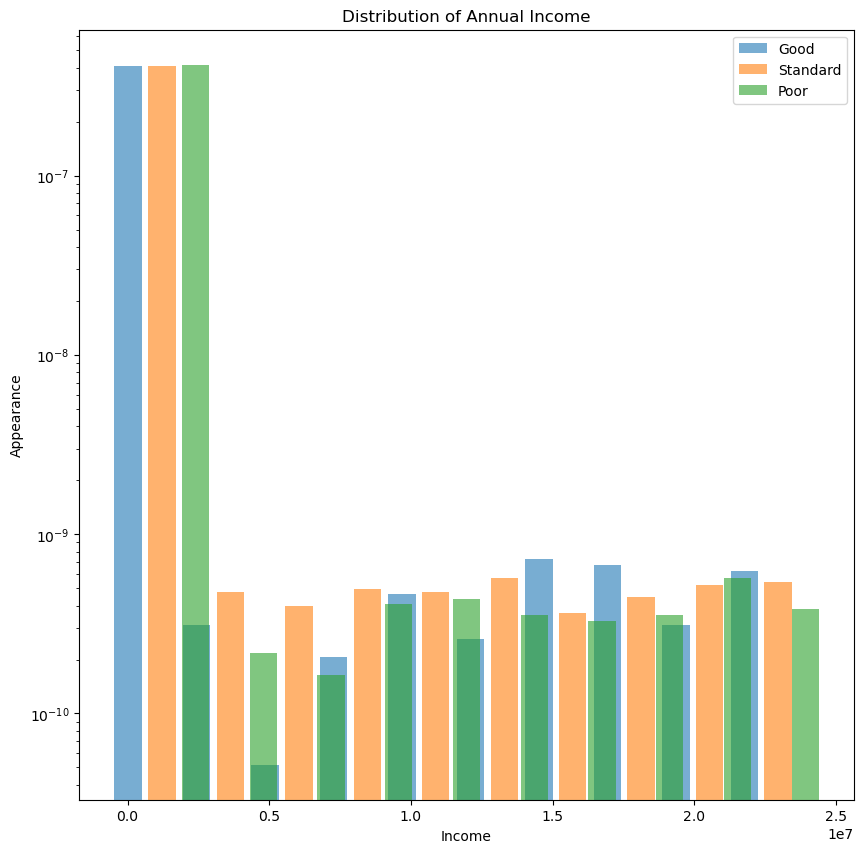

In [7]:
fig=plt.figure(figsize=(10,10))
plt.hist(annual_income[annual_income['Credit_Score']=='Good']['Annual_Income'],log=True,label='Good',stacked=False,align='left',density=True,rwidth=0.4,alpha=0.6)
plt.hist(annual_income[annual_income['Credit_Score']=='Standard']['Annual_Income'],log=True,label='Standard',stacked=False,align='mid',density=True,rwidth=0.4,alpha=0.6)
plt.hist(annual_income[annual_income['Credit_Score']=='Poor']['Annual_Income'],log=True,label='Poor',stacked=False,align='right',density=True,rwidth=0.4,alpha=0.6)
plt.legend(loc='upper right')
plt.xlabel('Income')
plt.ylabel('Appearance')
plt.title('Distribution of Annual Income')
plt.show()

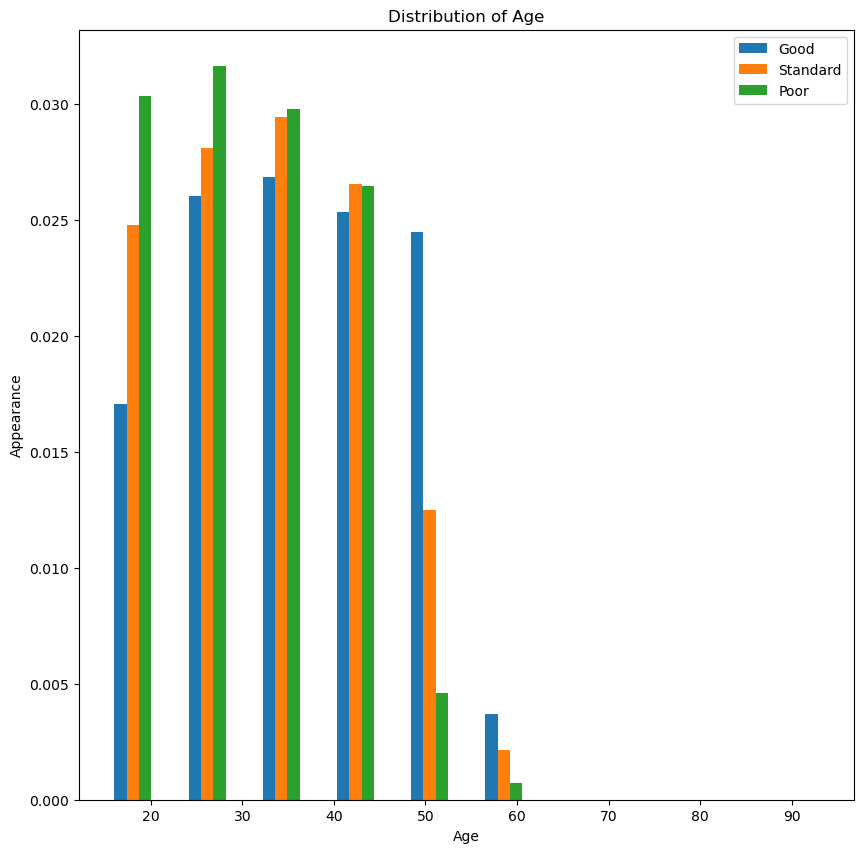

In [8]:
# distribution of age in different credit score
age=train_df[train_df['Age'].str.len()==2]
fig=plt.figure(figsize=(10,10))
bin=10
x=pd.to_numeric(age[age['Credit_Score']=='Good']['Age'])
y=pd.to_numeric(age[age['Credit_Score']=='Standard']['Age'])
z=pd.to_numeric(age[age['Credit_Score']=='Poor']['Age'])

plt.hist([x,y,z],label=['Good','Standard','Poor'],bins=bin,stacked=False,align='mid',density=True,rwidth=0.5)

plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Appearance')
plt.title('Distribution of Age')
plt.show()

C:\Users\cheng\AppData\Local\Temp\ipykernel_23084\1207611180.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Occupation[Occupation['Occupation']==occupation_list[i]]['Occupation']=i


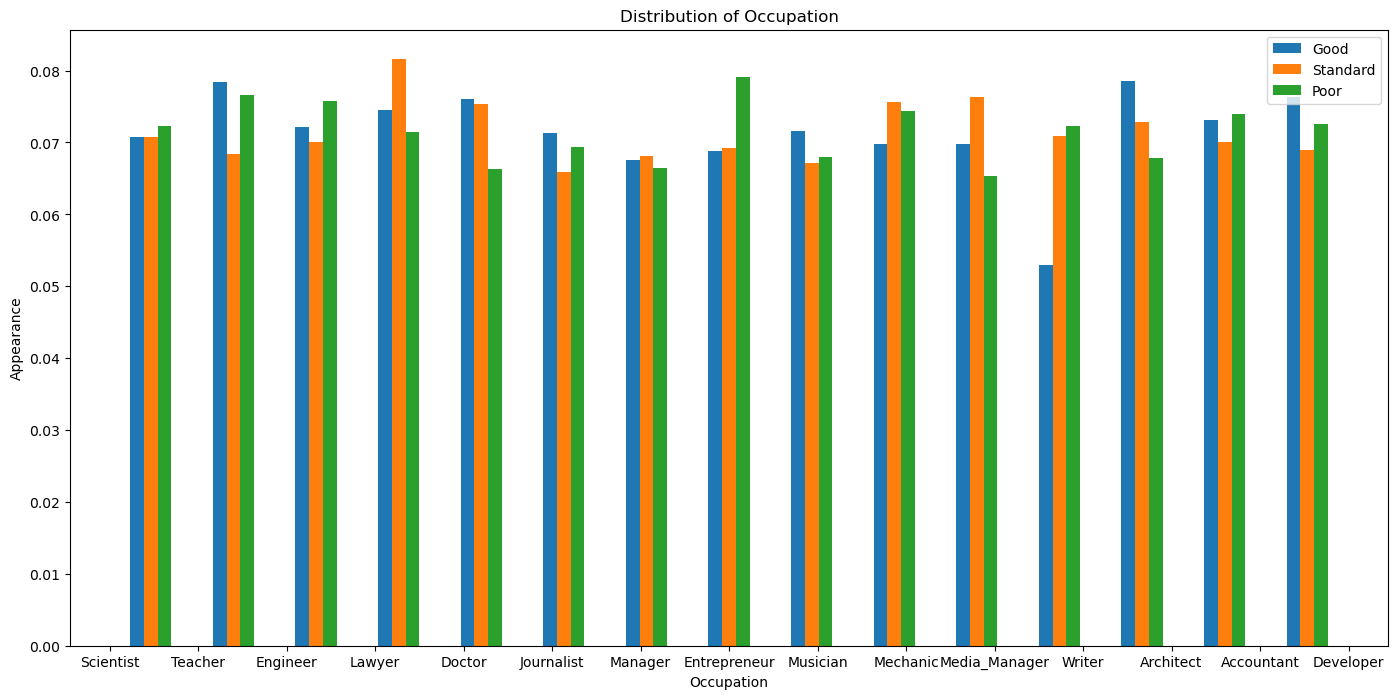

In [9]:
# distribution of occupation
Occupation=train_df[~ (train_df['Occupation']=='_______')]
occupation_list=['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']

#one-hot encoding
for i in range(len(occupation_list)):
    Occupation[Occupation['Occupation']==occupation_list[i]]['Occupation']=i


fig=plt.figure(figsize=(17,8))
x=Occupation[Occupation['Credit_Score']=='Good']['Occupation']
y=Occupation[Occupation['Credit_Score']=='Standard']['Occupation']
z=Occupation[Occupation['Credit_Score']=='Poor']['Occupation']


plt.hist([x,y,z],label=['Good','Standard','Poor'],stacked=False,bins=15,density=True,rwidth=0.5)

plt.legend(loc='upper right')
plt.xlabel('Occupation')
plt.ylabel('Appearance')
plt.title('Distribution of Occupation')
plt.show()

Text(0, 0.5, 'Outstanding Debt')

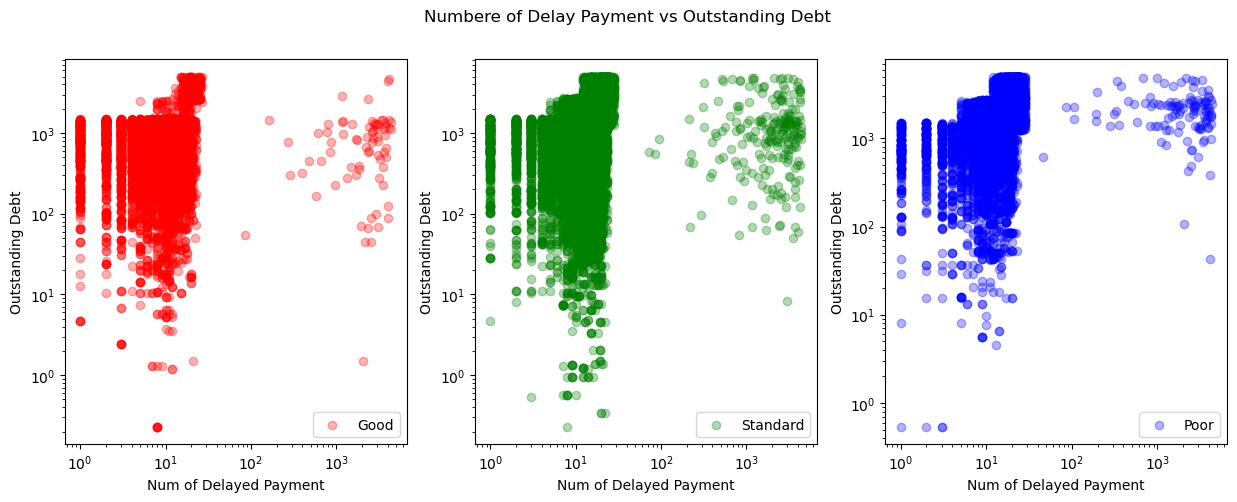

In [10]:
# between num_delay and outstanding debt
data=train_df.dropna(how='any')
data=data[~data['Num_of_Delayed_Payment'].str.contains('_')]
data=data[~data['Num_of_Delayed_Payment'].str.contains('-')]
data['Num_of_Delayed_Payment']=pd.to_numeric(data['Num_of_Delayed_Payment'])
data=data[~data['Outstanding_Debt'].str.contains('_')]
data['Outstanding_Debt']=pd.to_numeric(data['Outstanding_Debt'])

x1=data[data['Credit_Score']=='Good']['Num_of_Delayed_Payment']
y1=data[data['Credit_Score']=='Good']['Outstanding_Debt']

x2=data[data['Credit_Score']=='Standard']['Num_of_Delayed_Payment']
y2=data[data['Credit_Score']=='Standard']['Outstanding_Debt']

x3=data[data['Credit_Score']=='Poor']['Num_of_Delayed_Payment']
y3=data[data['Credit_Score']=='Poor']['Outstanding_Debt']

fig=plt.figure(figsize=(15,5))
fig.suptitle('Numbere of Delay Payment vs Outstanding Debt')
fig.add_subplot(131)
ax=plt.gca()
plt.scatter(x1,y1,c='r',label='Good',alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc='lower right')
plt.xlabel('Num of Delayed Payment')
plt.ylabel('Outstanding Debt')

fig.add_subplot(132)
ax=plt.gca()
plt.scatter(x2,y2,c='g',label='Standard',alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc='lower right')
plt.xlabel('Num of Delayed Payment')
plt.ylabel('Outstanding Debt')

fig.add_subplot(133)
ax=plt.gca()
plt.scatter(x3,y3,c='b',label='Poor',alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(loc='lower right')
plt.xlabel('Num of Delayed Payment')
plt.ylabel('Outstanding Debt')

#plt.title('Scatter Plot of Delayed Payment and Outstanding Debt')

C:\Users\cheng\AppData\Local\Temp\ipykernel_23084\2567533786.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  loan=loan[~(train_df['Num_of_Loan'].str.contains('-'))]


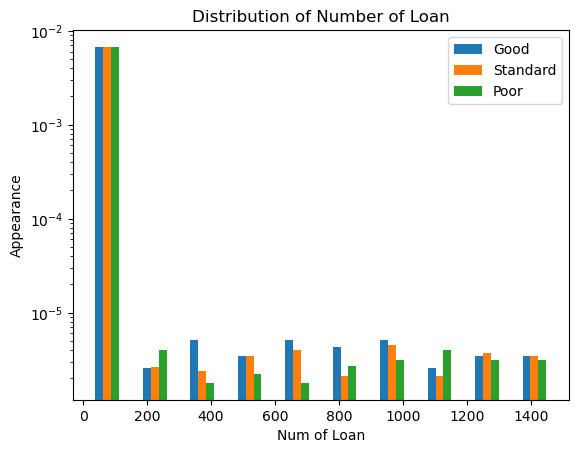

In [11]:
#train_df['Num_of_Loan'].unique()
loan=train_df[~(train_df['Num_of_Loan'].str.contains('_'))]
loan=loan[~(train_df['Num_of_Loan'].str.contains('-'))]
loan['Num_of_Loan']=pd.to_numeric(loan['Num_of_Loan'])


x=loan[loan['Credit_Score']=='Good']['Num_of_Loan']
y=loan[loan['Credit_Score']=='Standard']['Num_of_Loan']
z=loan[loan['Credit_Score']=='Poor']['Num_of_Loan']

loan[loan['Credit_Score']=='Good']['Num_of_Loan'].describe()
# x.unique()

plt.hist([x,y,z],label=['Good','Standard','Poor'],log=True,stacked=False,align='mid',density=True,rwidth=0.5)

plt.legend(loc='upper right')
plt.xlabel('Num of Loan')
plt.ylabel('Appearance')
plt.title('Distribution of Number of Loan')
plt.show()

In [12]:
loan[loan['Credit_Score']=='Standard']['Num_of_Loan'].describe()

count    25529.000000
mean         7.359904
std         59.713794
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1464.000000
Name: Num_of_Loan, dtype: float64

In [13]:
loan[loan['Credit_Score']=='Poor']['Num_of_Loan'].describe()

count    15099.000000
mean         8.244188
std         58.249077
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max       1485.000000
Name: Num_of_Loan, dtype: float64

Text(0.5, 1.0, 'Distribution of Monthly Salary')

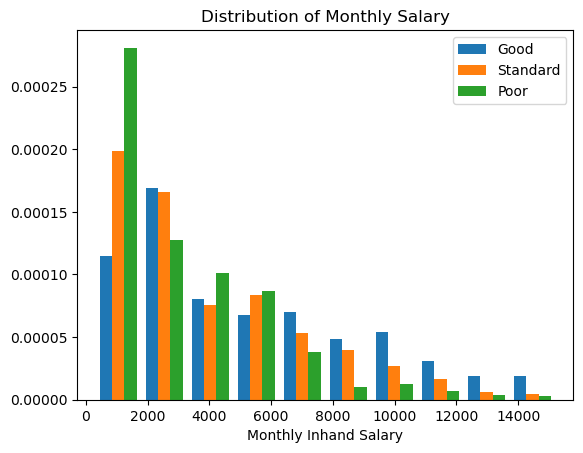

In [14]:
# monthly inhand salary
salary=train_df.dropna(how='any')
x=salary[salary['Credit_Score']=='Good']['Monthly_Inhand_Salary']
y=salary[salary['Credit_Score']=='Standard']['Monthly_Inhand_Salary']
z=salary[salary['Credit_Score']=='Poor']['Monthly_Inhand_Salary']

fig=plt.figure()
plt.hist([x,y,z],bins=10,label=['Good','Standard','Poor'],density=True)
plt.legend(loc='upper right')
plt.xlabel('Monthly Inhand Salary')
plt.title('Distribution of Monthly Salary')

Text(0, 0.5, 'Interest rate')

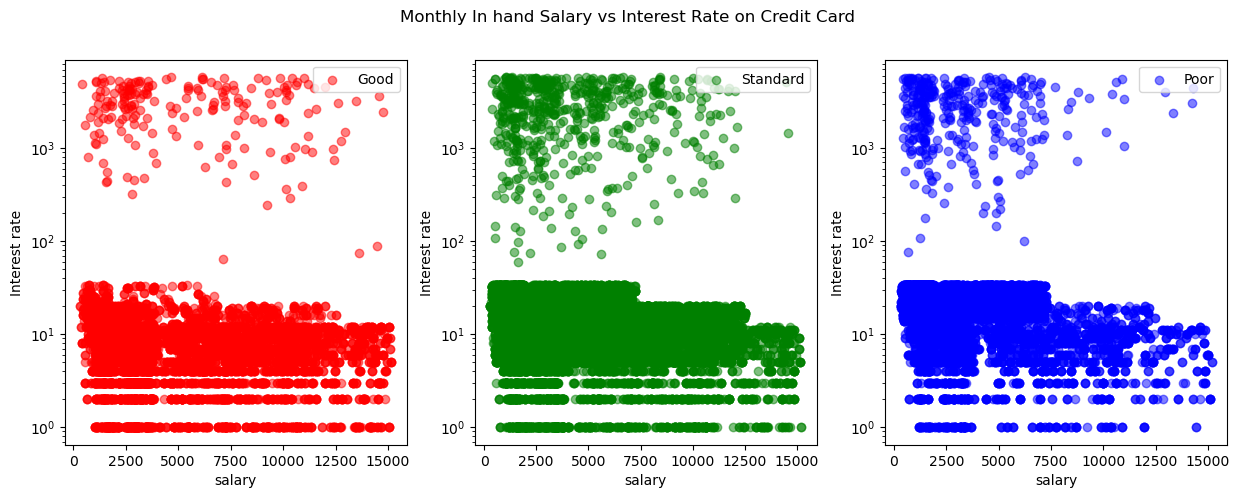

In [15]:
#Interest rate

w=salary[salary['Credit_Score']=='Good']['Interest_Rate']
n=salary[salary['Credit_Score']=='Standard']['Interest_Rate']
m=salary[salary['Credit_Score']=='Poor']['Interest_Rate']

fig=plt.figure(figsize=(15,5))
fig.suptitle('Monthly In hand Salary vs Interest Rate on Credit Card')
fig.add_subplot(131)
ax=plt.gca()
plt.scatter(x,w,c='r',label='Good',alpha=0.5)
ax.set_yscale('log')
plt.legend(loc='upper right')
plt.xlabel('salary')
plt.ylabel('Interest rate')

fig.add_subplot(132)
ax=plt.gca()
plt.scatter(y,n,c='g',label='Standard',alpha=0.5)
plt.legend(loc='upper right')
ax.set_yscale('log')
plt.xlabel('salary')
plt.ylabel('Interest rate')

fig.add_subplot(133)
ax=plt.gca()
plt.scatter(z,m,c='b',label='Poor',alpha=0.5)
plt.legend(loc='upper right')
ax.set_yscale('log')
plt.xlabel('salary')
plt.ylabel('Interest rate')

In [16]:
# data we need to use
# feature_list=['Occupation','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
#               'Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Num_Credit_Inquiries','Outstanding_Debt',
#               'Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

# how to get clean data

# proper_age=train_df[train_df['Age'].str.len()==2]
# proper_annual_income=train_df[~train_df['Annual_Income'].str.contains('_')]
# proper_occupation=train_df[~train_df['Occupation'].str=='_______']

# proper_num_of_delay=train_df.dropna(how='any')
# proper_num_of_delay=proper_num_of_delay[~proper_num_of_delay['Num_of_Delayed_Payment'].str.contains('_')]
# proper_num_of_delay=proper_num_of_delay[~proper_num_of_delay['Num_of_Delayed_Payment'].str.contains('-')]

#proper_credit_inq=train_df.dropna('any'), to numeric

# proper_credit_mix=train_df[~train_df['Credit_Mix'].str.contains('_')]
# proper_outstanding=train_df[~train_df['Outstanding_Debt'].str.contains('_')]

# proper_amount=train_df.dropna(how='any')
# proper_amount=proper_amount[~proper_amound['Amount_invested_monthly'].str.contains('_')]

# test=train_df[~train_df['Amount_invested_monthly'].str.contains('_')]
# test=test.dropna()
# test=test[~test['Num_of_Delayed_Payment'].str.contains('_')]
# test=test[~test['Num_of_Delayed_Payment'].str.contains('-')]


# print(pd.to_numeric(test['Amount_invested_monthly']))
# test=train_df.dropna(how='any')
# test['Num_Credit_Inquiries'].unique()
# test=test[~test['Amount_invested_monthly'].str.contains('_')]
# print(pd.to_numeric(test['Num_Credit_Inquiries']))

0        4.0
6        4.0
8        2.0
9        2.0
10       2.0
        ... 
99994    3.0
99995    3.0
99996    3.0
99997    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 53049, dtype: float64


# Data cleaning

In [180]:
clean_data=train_df.dropna(how='any')

clean_data=clean_data[clean_data['Age'].str.len()==2]

clean_data=clean_data[~(clean_data['Annual_Income'].str.contains('_'))]
clean_data['Annual_Income']=pd.to_numeric(clean_data['Annual_Income'])

clean_data=clean_data[~ (clean_data['Occupation']=='_______')]

clean_data=clean_data[~clean_data['Num_of_Delayed_Payment'].str.contains('_')]
clean_data=clean_data[~clean_data['Num_of_Delayed_Payment'].str.contains('-')]
clean_data['Num_of_Delayed_Payment']=pd.to_numeric(clean_data['Num_of_Delayed_Payment'])

clean_data=clean_data[~clean_data['Outstanding_Debt'].str.contains('_')]
clean_data['Outstanding_Debt']=pd.to_numeric(clean_data['Outstanding_Debt'])

clean_data=clean_data[~(clean_data['Num_of_Loan'].str.contains('_'))]
clean_data=clean_data[~(clean_data['Num_of_Loan'].str.contains('-'))]
clean_data['Num_of_Loan']=pd.to_numeric(clean_data['Num_of_Loan'])


clean_data=clean_data[~(clean_data['Monthly_Balance'].str.contains('_'))]
clean_data['Monthly_Balance']=pd.to_numeric(clean_data['Monthly_Balance'])

clean_data=clean_data[~(clean_data['Amount_invested_monthly'].str.contains('_'))]
clean_data['Amount_invested_monthly']=pd.to_numeric(clean_data['Amount_invested_monthly'])

In [181]:
#one hot encode label, occupation
label_mapping = {'Good': 0, 'Standard': 1, 'Poor': 2}
clean_data['Credit_Score'] = clean_data['Credit_Score'].map(label_mapping)


occupation_mapping= {'Scientist':0, 'Teacher':1, 'Engineer':2, 'Entrepreneur':3, 'Developer':4,
       'Lawyer':5, 'Media_Manager':6, 'Doctor':7, 'Journalist':8, 'Manager':9,
       'Accountant':10, 'Musician':11, 'Mechanic':12, 'Writer':13, 'Architect':14}

clean_data['Occupation']=clean_data['Occupation'].map(occupation_mapping)
clean_data.info()
clean_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 35312 entries, 0 to 99997
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        35312 non-null  object 
 1   Customer_ID               35312 non-null  object 
 2   Month                     35312 non-null  object 
 3   Name                      35312 non-null  object 
 4   Age                       35312 non-null  object 
 5   SSN                       35312 non-null  object 
 6   Occupation                35312 non-null  int64  
 7   Annual_Income             35312 non-null  float64
 8   Monthly_Inhand_Salary     35312 non-null  float64
 9   Num_Bank_Accounts         35312 non-null  int64  
 10  Num_Credit_Card           35312 non-null  int64  
 11  Interest_Rate             35312 non-null  int64  
 12  Num_of_Loan               35312 non-null  int64  
 13  Type_of_Loan              35312 non-null  object 
 14  Delay_from_

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Learning and Predicting

## Random Forest

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [252]:
feature_list=['Occupation','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
              'Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Num_Credit_Inquiries','Outstanding_Debt',
              'Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
X=clean_data[feature_list]
Y=clean_data['Credit_Score']
X.head()

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,0,19114.12,1824.843333,3,4,3,4,3,7,4.0,809.98,26.822620,49.574949,80.415295,312.494089
9,1,34847.84,3037.986667,2,4,6,1,7,1,2.0,605.03,38.550848,18.816215,40.391238,484.591214
12,1,34847.84,3037.986667,2,4,6,1,3,1,2.0,605.03,34.977895,18.816215,130.115420,444.867032
13,1,34847.84,3037.986667,2,4,6,1,3,0,2.0,605.03,33.381010,18.816215,43.477190,481.505262
15,1,34847.84,3037.986667,2,4,6,1,3,4,2.0,605.03,32.933856,18.816215,218.904344,356.078109


In [253]:
#standardize the feature
scaler= StandardScaler()
scaled_features=scaler.fit_transform(X)
X=pd.DataFrame(scaled_features,columns=X.columns)
X.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [255]:
model = RandomForestClassifier(random_state=42,oob_score=True)
model.fit(X_train, Y_train)


RandomForestClassifier(oob_score=True, random_state=42)

In [269]:
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.74
[[ 969  698   18]
 [ 423 4435  729]
 [  55  815 2452]]
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      1685
           1       0.75      0.79      0.77      5587
           2       0.77      0.74      0.75      3322

    accuracy                           0.74     10594
   macro avg       0.73      0.70      0.71     10594
weighted avg       0.74      0.74      0.74     10594



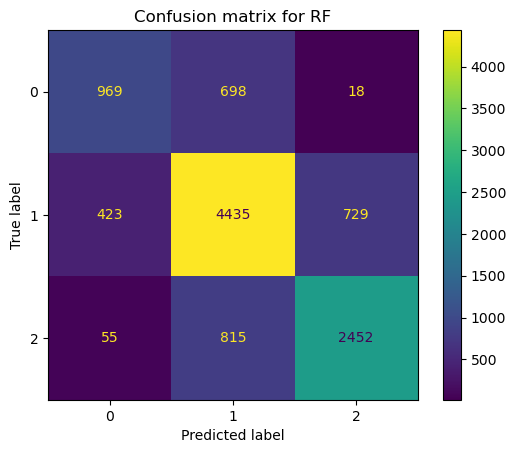

In [275]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,Y_pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
dis.plot()
plt.title('Confusion matrix for RF')
plt.show()

## KNN

In [270]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)

accuracy = accuracy_score(Y_test, pred)
print(f'Accuracy: {accuracy:.2f}')
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

Accuracy: 0.53
[[ 539  961  185]
 [ 952 3390 1245]
 [ 196 1391 1735]]
              precision    recall  f1-score   support

           0       0.32      0.32      0.32      1685
           1       0.59      0.61      0.60      5587
           2       0.55      0.52      0.53      3322

    accuracy                           0.53     10594
   macro avg       0.49      0.48      0.48     10594
weighted avg       0.53      0.53      0.53     10594



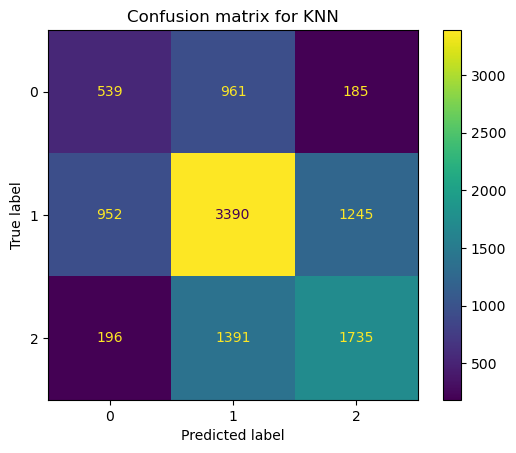

In [274]:
cm=confusion_matrix(Y_test,pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
dis.plot()
plt.title('Confusion matrix for KNN')
plt.show()